In [1]:
#Import necessary functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium


#For Time Series 
from datetime import datetime as dt
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima


%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2018-2023_V1.csv')
df.head()

,CRASH DATE TIME,COLLISION_ID,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,CONTRIBUTING CATEGORY V1,SEASON,TIME OF DAY,IS RUSH HOUR
0,2018-01-01 00:00:00,3820851,BROOKLYN,11239,40.65306,-73.88202,0,0,Driver Inattention/Distraction,Sedan,Driver Error,Winter,Late Night,False
1,2018-01-01 00:00:00,3820945,BROOKLYN,11234,40.62877,-73.91825,1,0,Failure to Yield Right-of-Way,Sedan,Moving Violation,Winter,Late Night,False
2,2018-01-01 00:00:00,3819067,QUEENS,11419,40.68297,-73.82824,0,0,Passing Too Closely,Sedan,Moving Violation,Winter,Late Night,False
3,2018-01-01 00:00:00,3822296,BROOKLYN,11230,40.62418,-73.97048,0,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,Driver Error,Winter,Late Night,False
4,2018-01-01 00:00:00,3821055,BROOKLYN,11230,40.62322,-73.96102,0,0,Driver Inattention/Distraction,Taxi,Driver Error,Winter,Late Night,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213962 entries, 0 to 213961
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE TIME                213962 non-null  object 
 1   COLLISION_ID                   213962 non-null  int64  
 2   BOROUGH                        213962 non-null  object 
 3   ZIP CODE                       213962 non-null  int64  
 4   LATITUDE                       213962 non-null  float64
 5   LONGITUDE                      213962 non-null  float64
 6   NUMBER OF PERSONS INJURED      213962 non-null  int64  
 7   NUMBER OF PERSONS KILLED       213962 non-null  int64  
 8   CONTRIBUTING FACTOR VEHICLE 1  213962 non-null  object 
 9   VEHICLE TYPE CODE 1            213962 non-null  object 
 10  CONTRIBUTING CATEGORY V1       213962 non-null  object 
 11  SEASON                         213962 non-null  object 
 12  TIME OF DAY                   

#### Changing DateTime Index

In [4]:
#Change column to datetime datatype
df['CRASH DATE TIME'] = pd.to_datetime(df['CRASH DATE TIME'])

In [5]:
ts = df.copy()
ts.head()

,CRASH DATE TIME,COLLISION_ID,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,CONTRIBUTING CATEGORY V1,SEASON,TIME OF DAY,IS RUSH HOUR
0,2018-01-01,3820851,BROOKLYN,11239,40.65306,-73.88202,0,0,Driver Inattention/Distraction,Sedan,Driver Error,Winter,Late Night,False
1,2018-01-01,3820945,BROOKLYN,11234,40.62877,-73.91825,1,0,Failure to Yield Right-of-Way,Sedan,Moving Violation,Winter,Late Night,False
2,2018-01-01,3819067,QUEENS,11419,40.68297,-73.82824,0,0,Passing Too Closely,Sedan,Moving Violation,Winter,Late Night,False
3,2018-01-01,3822296,BROOKLYN,11230,40.62418,-73.97048,0,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,Driver Error,Winter,Late Night,False
4,2018-01-01,3821055,BROOKLYN,11230,40.62322,-73.96102,0,0,Driver Inattention/Distraction,Taxi,Driver Error,Winter,Late Night,False


## Groupby Daily

In [ ]:
#Group the values by day and count the number of instances of each value
daily_count = ts.groupby([df['CRASH DATE TIME'].dt.date, 'CONTRIBUTING CATEGORY V1']).size().reset_index(name='count')

#Print the result
print(daily_count)

In [ ]:
#Create pivot table of daily cause categories
queens_pivt = queens_count.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)
queens_pivt.head(10)

### Groupby Weekly

In [6]:
# Group the values by week and count the number of instances of each value
ts_count = ts.groupby([pd.Grouper(key='CRASH DATE TIME', freq='W'), 'CONTRIBUTING CATEGORY V1']).size().reset_index(name='count')

# Print the result
print(ts_count)

     CRASH DATE TIME     CONTRIBUTING CATEGORY V1  count
0         2018-01-07            Bodily Impairment     21
1         2018-01-07                 Driver Error    358
2         2018-01-07        Environmental Factors     23
3         2018-01-07   Internal Electronics Usage      1
4         2018-01-07             Moving Violation    558
...              ...                          ...    ...
2449      2023-01-01           Other Distractions      1
2450      2023-01-01              Road Conditions      2
2451      2023-01-01  Third-Party (Non-Vehicular)      2
2452      2023-01-01      Third-Party (Vehicular)     13
2453      2023-01-01              Vehicle Defects      2

[2454 rows x 3 columns]


In [7]:
#Create pivot table of daily cause categories
ts_pivt = ts_count.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)
ts_pivt.head(10)

CONTRIBUTING CATEGORY V1,Bodily Impairment,Driver Error,Environmental Factors,Internal Electronics Usage,Moving Violation,Other Distractions,Road Conditions,Third-Party (Non-Vehicular),Third-Party (Vehicular),Vehicle Defects
CRASH DATE TIME,,,,,,,,,,
2018-01-07,21.0,358.0,23.0,1.0,558.0,8.0,131.0,7.0,41.0,18.0
2018-01-14,20.0,439.0,23.0,3.0,704.0,3.0,35.0,7.0,55.0,10.0
2018-01-21,21.0,376.0,22.0,1.0,582.0,5.0,11.0,4.0,40.0,12.0
2018-01-28,29.0,396.0,19.0,1.0,568.0,6.0,10.0,8.0,40.0,5.0
2018-02-04,27.0,399.0,22.0,0.0,568.0,8.0,7.0,10.0,42.0,17.0
2018-02-11,38.0,422.0,20.0,1.0,589.0,4.0,28.0,6.0,39.0,16.0
2018-02-18,17.0,366.0,15.0,1.0,559.0,5.0,23.0,5.0,49.0,4.0
2018-02-25,33.0,396.0,9.0,2.0,579.0,7.0,7.0,9.0,29.0,5.0
2018-03-04,23.0,381.0,23.0,1.0,621.0,6.0,17.0,12.0,40.0,11.0


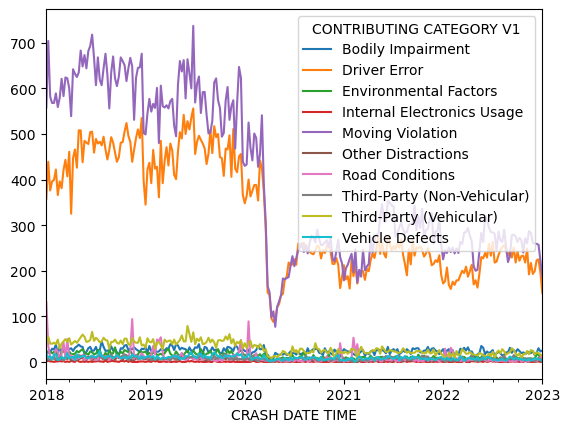

In [8]:
ts_pivt.plot();

In [9]:
#Converting the index as datetime index
ts_pivt.index = pd.to_datetime(ts_pivt.index)

In [10]:
#Select highest causes of collision
ts_mv = ts_pivt[['Moving Violation']]
ts_mv

CONTRIBUTING CATEGORY V1,Moving Violation
CRASH DATE TIME,
2018-01-07,558.0
2018-01-14,704.0
2018-01-21,582.0
2018-01-28,568.0
2018-02-04,568.0
...,...
2022-12-04,260.0
2022-12-11,259.0
2022-12-18,257.0


In [11]:
ts_mv.describe()

CONTRIBUTING CATEGORY V1,Moving Violation
count,261.000000
mean,400.467433
std,175.373107
min,77.000000
25%,257.000000
50%,308.000000
75%,577.000000
max,737.000000


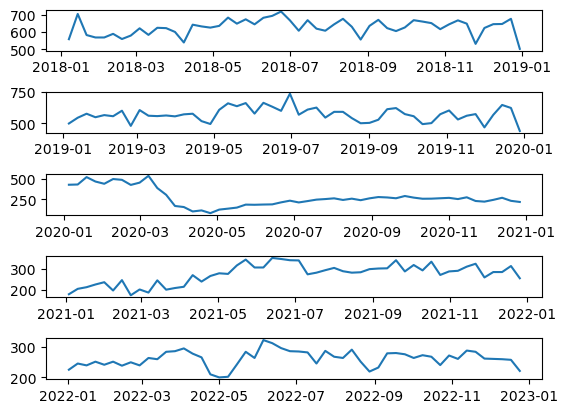

In [12]:
from pandas import Grouper, DataFrame
from matplotlib import pyplot


groups = ts_mv['2018':'2022'].groupby(Grouper(freq='A'))
years = DataFrame()
pyplot.figure()
plt.subplots_adjust(hspace=1.0)

i = 1
n_groups = len(groups)
for name, group in groups:
  pyplot.subplot((n_groups*100) + 10 + i)
  i += 1
  pyplot.plot(group)
pyplot.show()

## Figuring it Out..

In [13]:
diff_shift_ts_mv = ts_mv.copy()

#Differencing
diff_shift_ts_mv['Differenced'] = diff_shift_ts_mv.diff().dropna()
diff_shift_ts_mv

CONTRIBUTING CATEGORY V1,Moving Violation,Differenced
CRASH DATE TIME,,
2018-01-07,558.0,NaN
2018-01-14,704.0,146.0
2018-01-21,582.0,-122.0
2018-01-28,568.0,-14.0
2018-02-04,568.0,0.0
...,...,...
2022-12-04,260.0,-1.0
2022-12-11,259.0,-1.0
2022-12-18,257.0,-2.0


In [14]:
diff_shift_ts_mv['One Shift'] = diff_shift_ts_mv['Moving Violation'].shift(1)
diff_shift_ts_mv

CONTRIBUTING CATEGORY V1,Moving Violation,Differenced,One Shift
CRASH DATE TIME,,,
2018-01-07,558.0,NaN,NaN
2018-01-14,704.0,146.0,558.0
2018-01-21,582.0,-122.0,704.0
2018-01-28,568.0,-14.0,582.0
2018-02-04,568.0,0.0,568.0
...,...,...,...
2022-12-04,260.0,-1.0,261.0
2022-12-11,259.0,-1.0,260.0
2022-12-18,257.0,-2.0,259.0


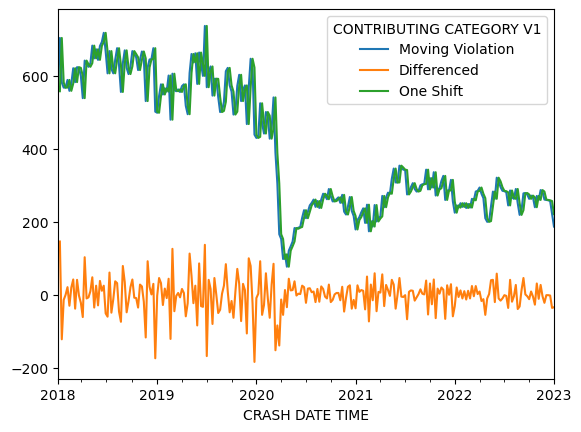

In [15]:
diff_shift_ts_mv.plot();

## Stationarity
Before we can begin modeling, we must check the stationarity of the dataset. A stationary dataset is required for Time Series models to perform well and accurately.

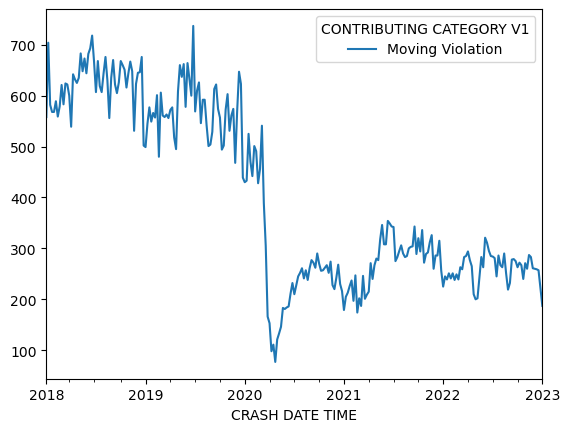

In [16]:
ts_mv.plot();

In [17]:
from statsmodels.tsa.stattools import adfuller

vtest = adfuller(ts_mv)
vtest

(-1.2201982510610434,
 0.664847146888407,
 3,
 257,
 {'1%': -3.4560535712549925,
  '5%': -2.8728527662442334,
  '10%': -2.5727985212493754},
 2541.4538927602907)

In [18]:
p_val = adfuller(ts_mv)[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" therefore we can safely assume that the data is stationary.")
else:
    print(" therefore we cannot reject the null hypothesis that the data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 0.664847146888407,
 therefore we cannot reject the null hypothesis that the data is not stationary.


#### Differencing

In [19]:
diff = ts_mv.diff().dropna()

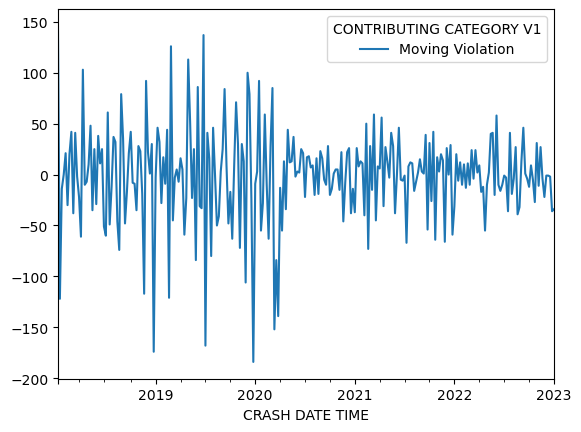

In [20]:
diff.plot();

In [21]:
difftest = adfuller(diff)
difftest

(-12.385592848400405,
 4.917740633589227e-23,
 2,
 257,
 {'1%': -3.4560535712549925,
  '5%': -2.8728527662442334,
  '10%': -2.5727985212493754},
 2531.7724427004814)

In [22]:
diff_pval = adfuller(diff)[1]

print(f"The p-value associated with the Dickey-Fuller statistical test is {diff_pval},")
if diff_pval < 0.05:
    print(" therefore we can safely assume that subtracted rolling mean data is stationary.")
else:
    print(" therefore we cannot reject the null hypothesis that subtracted rolling mean data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 4.917740633589227e-23,
 therefore we can safely assume that subtracted rolling mean data is stationary.


## Train Test Split

In [23]:
# find the index which allows us to split off 20% of the data
cutoff = round(diff.shape[0]*0.8) #cut off point at 80% of the data
cutoff

208

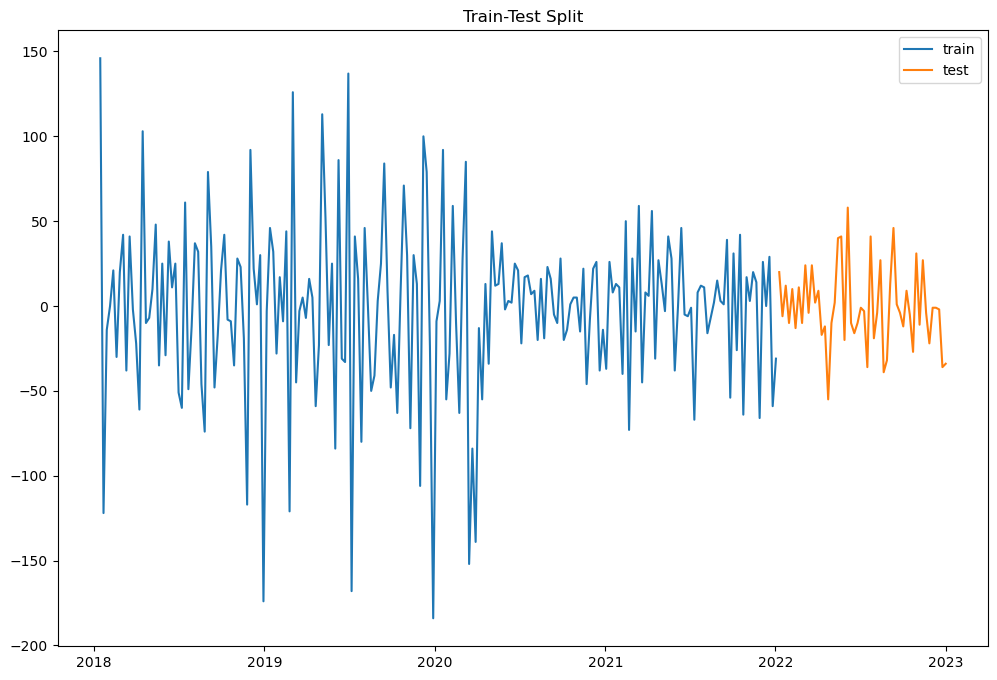

In [24]:
# Define train and test sets according to the index found above
train = diff[:cutoff] #before cut off is train set -- 80%

test = diff[cutoff:] #after cut off is the test set --20%

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

# Baseline Model
The baseline model is a naive model, which is just one shift in time by one period in time and in this case, it would be by 1 week. The metric that will be used to determine the quality and effectiveness of the model will be Root Mean Squared Error (RMSE). 

In [25]:
#Shift the prediction for the next week 
naive = train.shift(1)
naive

CONTRIBUTING CATEGORY V1,Moving Violation
CRASH DATE TIME,
2018-01-14,NaN
2018-01-21,146.0
2018-01-28,-122.0
2018-02-04,-14.0
2018-02-11,0.0
...,...
2021-12-05,-66.0
2021-12-12,26.0
2021-12-19,0.0


In [26]:
plt.figure(figsize=(12, 8))

baseline = train.copy()
baseline['One Shift'] = baseline['Moving Violation'].shift(1)
baseline

CONTRIBUTING CATEGORY V1,Moving Violation,One Shift
CRASH DATE TIME,,
2018-01-14,146.0,NaN
2018-01-21,-122.0,146.0
2018-01-28,-14.0,-122.0
2018-02-04,0.0,-14.0
2018-02-11,21.0,0.0
...,...,...
2021-12-05,26.0,-66.0
2021-12-12,0.0,26.0
2021-12-19,29.0,0.0


<Figure size 1200x800 with 0 Axes>

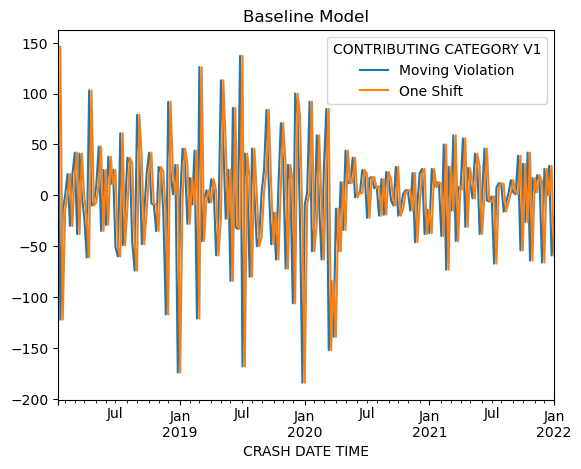

In [27]:
baseline.plot()
plt.title('Baseline Model');

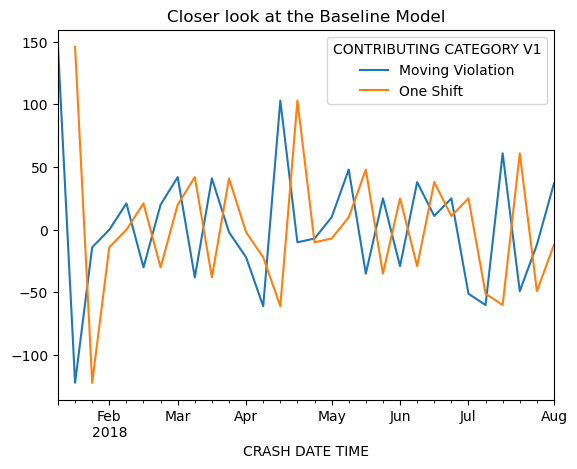

In [28]:
#A closer look
baseline[0:30].plot()
plt.title('Closer look at the Baseline Model');

In [29]:
plt.figure(figsize=(12, 8))

baseline = train.copy()
baseline['One Shift'] = baseline['Moving Violation'].shift(1)

baseline_test = baseline[1:]
baseline_test

CONTRIBUTING CATEGORY V1,Moving Violation,One Shift
CRASH DATE TIME,,
2018-01-21,-122.0,146.0
2018-01-28,-14.0,-122.0
2018-02-04,0.0,-14.0
2018-02-11,21.0,0.0
2018-02-18,-30.0,21.0
...,...,...
2021-12-05,26.0,-66.0
2021-12-12,0.0,26.0
2021-12-19,29.0,0.0


<Figure size 1200x800 with 0 Axes>

In [30]:
baseline_rmse = np.sqrt(mean_squared_error(baseline_test['Moving Violation'], baseline_test['One Shift']))

print(f'Baseline Model RMSE: {baseline_rmse}')

Baseline Model RMSE: 80.00649128253905


## ARIMA

In [31]:
#from pmdarima import auto_arima
#stepwise_fit = auto_arima(train, trace=True, suppress_warnings=True)

In [32]:
train

CONTRIBUTING CATEGORY V1,Moving Violation
CRASH DATE TIME,
2018-01-14,146.0
2018-01-21,-122.0
2018-01-28,-14.0
2018-02-04,0.0
2018-02-11,21.0
...,...
2021-12-05,26.0
2021-12-12,0.0
2021-12-19,29.0


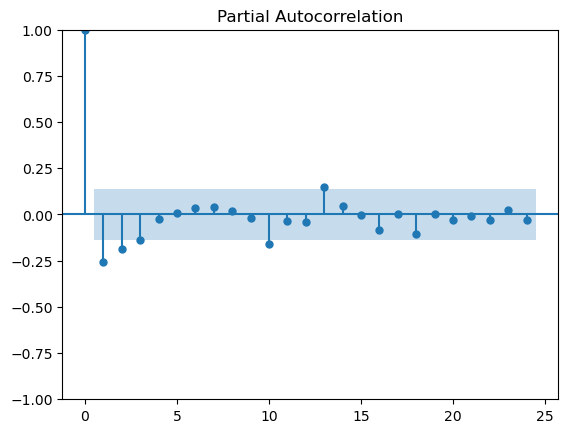

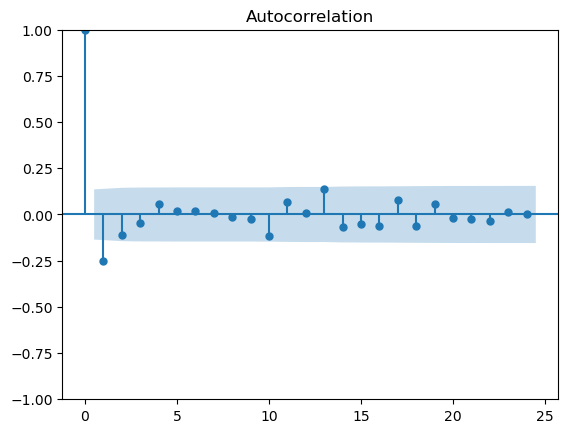

In [33]:
#Plot_pacf is used to identify the p parameter 
plot_pacf(train)

#Plot_acf is used to identify the q parameter
plot_acf(train);

p = 1 and q = 1

In [34]:
ARIMA1 = ARIMA(train['Moving Violation'], order=(1, 0, 1)).fit()
ARIMA1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Moving Violation   No. Observations:                  208
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1100.292
Date:                Mon, 10 Apr 2023   AIC                           2208.584
Time:                        17:07:24   BIC                           2221.934
Sample:                    01-14-2018   HQIC                          2213.982
                         - 01-02-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6829      2.055     -0.819      0.413      -5.711       2.345
ar.L1          0.2342      0.147      1.597      0.110      -0.053       0.522
ma.L1         -0.5771      0.125     -4.630      0.000      -0.821      -0.333
sigma2      2300.4341    174.534     13.180      0.000    1958.353    2642.515
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                51.31
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# We put a typ='levels' to convert our predictions to remove the differencing performed.
train_pred = ARIMA1.predict(typ='levels')

In [36]:
#
ARIMA1_rmse = np.sqrt(mean_squared_error(train, train_pred))

print(f'First ARIMA Model RMSE: {ARIMA1_rmse}')

First ARIMA Model RMSE: 48.099577600225224


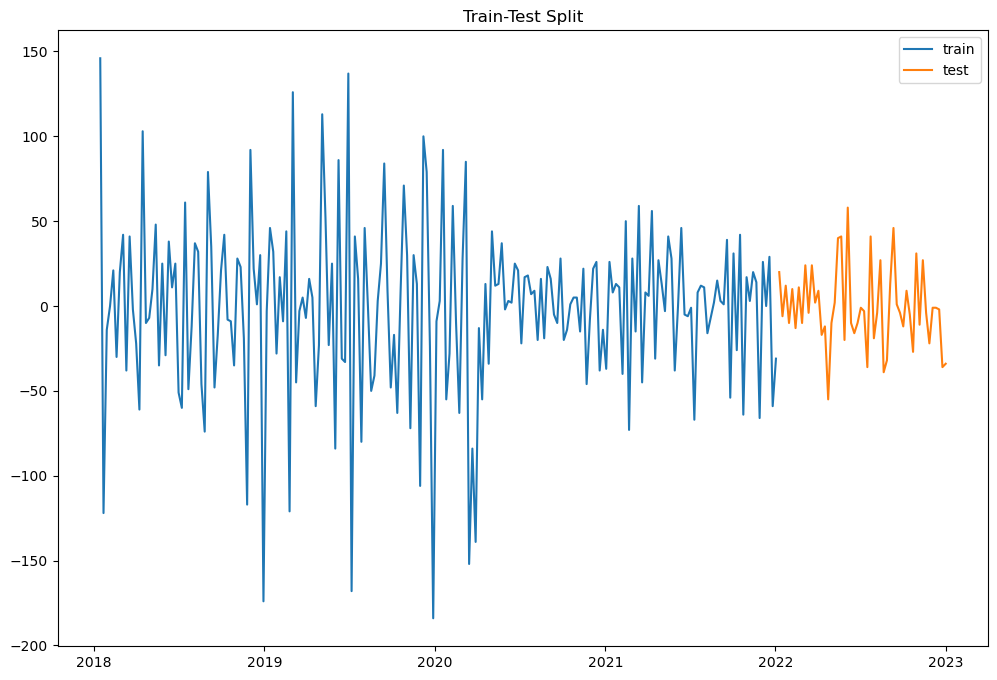

In [80]:
# Define train and test sets according to the index found above
train = diff[:cutoff] #before cut off is train set -- 80%

test = diff[cutoff:] #after cut off is the test set --20%

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

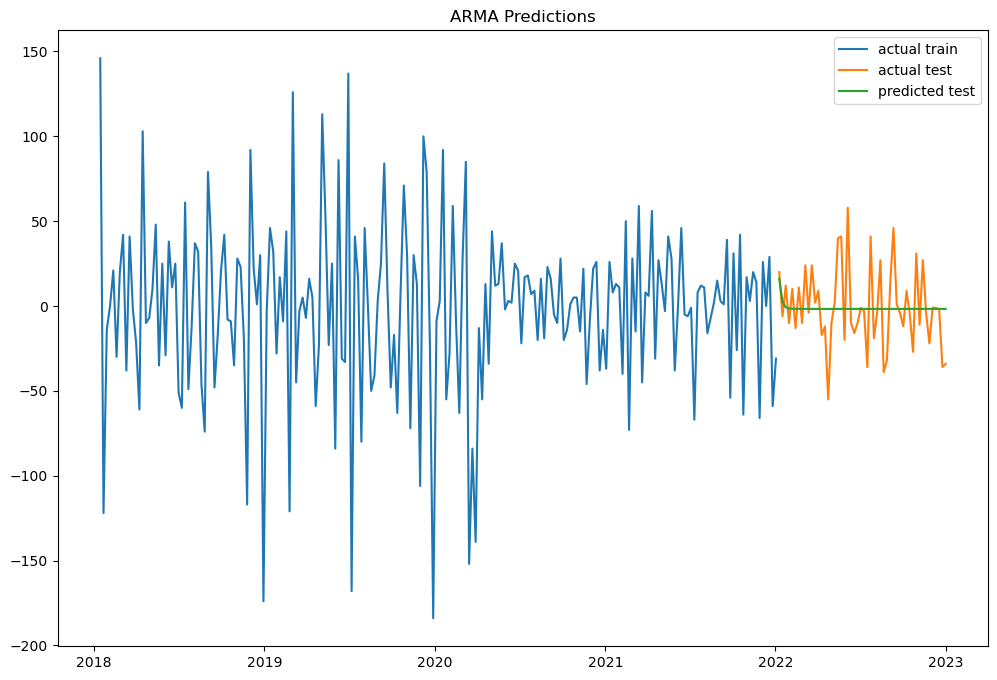

In [93]:
# generate predictions
df_pred = ARIMA1.predict(start='2022-01-09', end='2023-01-01')

# plot actual vs. predicted
fig = plt.figure(figsize=(12, 8))
plt.title('ARMA Predictions')
plt.plot(train, label='actual train')
plt.plot(test, label='actual test')
plt.plot(df_pred, label='predicted test');
plt.legend();

In [151]:
import pmdarima as pm

model = pm.auto_arima(ts_mv['Moving Violation'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2715.796, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2740.050, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2725.252, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2717.101, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2738.293, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2717.199, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2717.422, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2715.432, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2717.411, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2719.190, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2714.320, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2715.842, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2716.315, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=2716.309, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]          

In [162]:
import pmdarima as pm

model2 = pm.auto_arima(diff['Moving Violation'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2714.684, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2738.293, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2723.669, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2715.800, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2716.048, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2716.293, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2714.298, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2716.288, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2718.298, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2715.409, Time=0.15 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 0.699 seconds


In [163]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  260
Model:               SARIMAX(0, 0, 2)   Log Likelihood               -1354.149
Date:                Mon, 10 Apr 2023   AIC                           2714.298
Time:                        19:42:01   BIC                           2724.980
Sample:                    01-14-2018   HQIC                          2718.592
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3189      0.042     -7.566      0.000      -0.401      -0.236
ma.L2         -0.1134      0.049     -2.333      0.020      -0.209      -0.018
sigma2      1954.7564    110.987     17.613      0.000    1737.227    2172.286
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               100.04
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
#For predictions
train_pred2 = model2.predict()

In [165]:
#
model2_rmse = np.sqrt(mean_squared_error(train, train_pred2))

print(f'First ARIMA Model RMSE: {ARIMA1_rmse}')

First ARIMA Model RMSE: 48.099577600225224


In [59]:
ARIMA2 = ARIMA(train, order=(2, 0, 1)).fit()

ARIMA2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Moving Violation   No. Observations:                  208
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1099.882
Date:                Mon, 10 Apr 2023   AIC                           2209.764
Time:                        18:07:16   BIC                           2226.451
Sample:                    01-14-2018   HQIC                          2216.511
                         - 01-02-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6724      2.123     -0.788      0.431      -5.834       2.489
ar.L1          0.1055      0.247      0.427      0.669      -0.379       0.590
ar.L2         -0.0971      0.112     -0.868      0.385      -0.316       0.122
ma.L1         -0.4383      0.252     -1.740      0.082      -0.932       0.055
sigma2      2291.3612    175.346     13.068      0.000    1947.690    2635.032
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                56.11
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
# We put a typ='levels' to convert our predictions to remove the differencing performed.
train_pred2 = ARIMA2.predict(typ='levels')

In [61]:
#
ARIMA2_rmse = np.sqrt(mean_squared_error(train, train_pred2))
print(f'Second ARIMA Model RMSE: {ARIMA2_rmse}')

Second ARIMA Model RMSE: 48.0132614908161


In [40]:
y_pred = ARIMA2.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA2.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

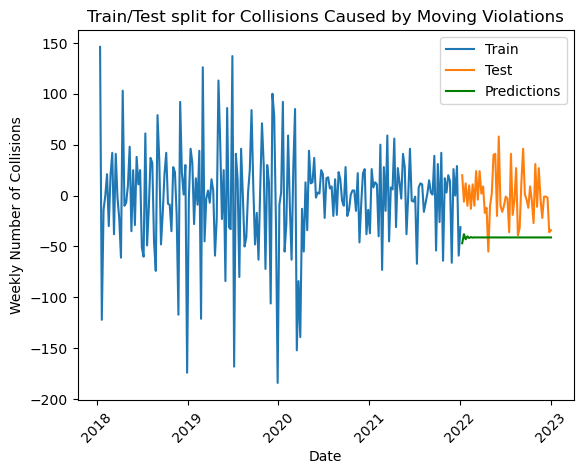

In [94]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.ylabel('Weekly Number of Collisions')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Collisions Caused by Moving Violations")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend();

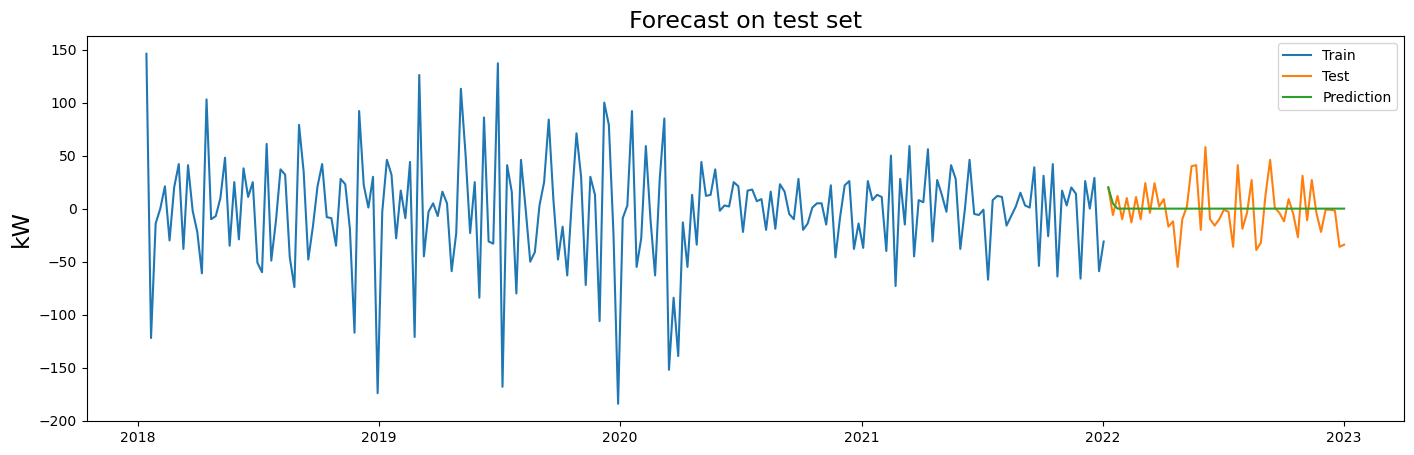

In [121]:
prediction=pd.DataFrame(arima_model.predict(n_periods=60),index=test.index)
prediction.columns=['predicted_yield']

fig,ax= plt.subplots(dpi=100,figsize=(17,5))
ax.plot(train,label='Train')
ax.plot(test,label='Test')
ax.plot(prediction,label='Prediction')
ax.legend()
ax.set_title('Forecast on test set',size=17)
ax.set_ylabel('kW',fontsize=17);

# AUTO ARIMA

Reference Source : https://medium.com/mlearning-ai/data-science-project-solar-panel-chapter-i-electricity-generation-prediction-with-arima-model-eb9b5d8bfd41

In [95]:
arima_model = auto_arima(train,
                         start_p=0,d=0,start_q=0,
                         max_p=4,max_d=4,max_q=4,
                         error_action='warn',trace=True,
                         supress_warning=True,stepwise=True,
                         n_fits=1)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2228.629, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2216.283, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2208.883, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2226.835, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2208.584, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2209.764, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2210.134, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2208.141, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2210.123, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2212.010, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2206.922, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2207.556, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2208.910, Time=0.07 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2208.891, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]          

In [42]:
arima_model = auto_arima(train,
                         start_p=0,d=0,start_q=0,
                         max_p=4,max_d=4,max_q=4,
                         start_P=0,D=1,start_Q=0,
                         max_P=1,max_D=1,max_Q=1,m=96,
                         seasonal=True,
                         error_action='warn',trace=True,
                         supress_warning=True,stepwise=True,
                         random_state=20,n_fits=1)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[96] intercept   : AIC=1289.746, Time=0.44 sec
 ARIMA(1,0,0)(1,1,0)[96] intercept   : AIC=inf, Time=17.99 sec
 ARIMA(0,0,1)(0,1,1)[96] intercept   : AIC=inf, Time=27.04 sec
 ARIMA(0,0,0)(0,1,0)[96]             : AIC=1287.812, Time=0.59 sec
 ARIMA(0,0,0)(1,1,0)[96] intercept   : AIC=inf, Time=11.73 sec
 ARIMA(0,0,0)(0,1,1)[96] intercept   : AIC=inf, Time=16.03 sec
 ARIMA(0,0,0)(1,1,1)[96] intercept   : AIC=inf, Time=21.11 sec
 ARIMA(1,0,0)(0,1,0)[96] intercept   : AIC=1283.314, Time=2.40 sec
 ARIMA(1,0,0)(0,1,1)[96] intercept   : AIC=inf, Time=24.74 sec
 ARIMA(1,0,0)(1,1,1)[96] intercept   : AIC=inf, Time=30.38 sec
 ARIMA(2,0,0)(0,1,0)[96] intercept   : AIC=1284.658, Time=3.12 sec
 ARIMA(1,0,1)(0,1,0)[96] intercept   : AIC=1282.880, Time=3.03 sec
 ARIMA(1,0,1)(1,1,0)[96] intercept   : AIC=1266.545, Time=50.26 sec
 ARIMA(1,0,1)(1,1,1)[96] intercept   : AIC=inf, Time=74.17 sec
 ARIMA(1,0,1)(0,1,1)[96] intercept   : AIC=inf, Ti

In [55]:
arima_model = auto_arima(train,
                         start_p=0,d=0,start_q=0,
                         max_p=4,max_d=4,max_q=4,
                         start_P=0,D=1,start_Q=0,
                         max_P=1,max_D=1,max_Q=1,m=96,
                         seasonal=True,
                         error_action='warn',trace=True,
                         supress_warning=True,stepwise=True,
                         n_fits=1)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[96] intercept   : AIC=1289.746, Time=0.52 sec
 ARIMA(1,0,0)(1,1,0)[96] intercept   : AIC=inf, Time=34.90 sec
 ARIMA(0,0,1)(0,1,1)[96] intercept   : AIC=inf, Time=36.33 sec
 ARIMA(0,0,0)(0,1,0)[96]             : AIC=1287.812, Time=0.56 sec
 ARIMA(0,0,0)(1,1,0)[96] intercept   : AIC=inf, Time=19.71 sec
 ARIMA(0,0,0)(0,1,1)[96] intercept   : AIC=inf, Time=26.42 sec
 ARIMA(0,0,0)(1,1,1)[96] intercept   : AIC=inf, Time=36.11 sec
 ARIMA(1,0,0)(0,1,0)[96] intercept   : AIC=1283.314, Time=2.91 sec
 ARIMA(1,0,0)(0,1,1)[96] intercept   : AIC=inf, Time=31.84 sec
 ARIMA(1,0,0)(1,1,1)[96] intercept   : AIC=inf, Time=34.24 sec
 ARIMA(2,0,0)(0,1,0)[96] intercept   : AIC=1284.658, Time=3.50 sec
 ARIMA(1,0,1)(0,1,0)[96] intercept   : AIC=1282.880, Time=8.23 sec
 ARIMA(1,0,1)(1,1,0)[96] intercept   : AIC=1266.545, Time=41.52 sec
 ARIMA(1,0,1)(1,1,1)[96] intercept   : AIC=inf, Time=91.38 sec
 ARIMA(1,0,1)(0,1,1)[96] intercept   : AIC=inf, Ti

AIC (Akaike's Information Criterion) metric is used to test the strength of a model. The ARIMA model with the lowest AIC is the best performing model.

In [105]:
from pandas.tseries.offsets import DateOffset

future_dates = [test.index[-1] + DateOffset(weeks=x) for x in range(0,2910,15) ]
future_dates

[Timestamp('2023-01-01 00:00:00'),
 Timestamp('2023-04-16 00:00:00'),
 Timestamp('2023-07-30 00:00:00'),
 Timestamp('2023-11-12 00:00:00'),
 Timestamp('2024-02-25 00:00:00'),
 Timestamp('2024-06-09 00:00:00'),
 Timestamp('2024-09-22 00:00:00'),
 Timestamp('2025-01-05 00:00:00'),
 Timestamp('2025-04-20 00:00:00'),
 Timestamp('2025-08-03 00:00:00'),
 Timestamp('2025-11-16 00:00:00'),
 Timestamp('2026-03-01 00:00:00'),
 Timestamp('2026-06-14 00:00:00'),
 Timestamp('2026-09-27 00:00:00'),
 Timestamp('2027-01-10 00:00:00'),
 Timestamp('2027-04-25 00:00:00'),
 Timestamp('2027-08-08 00:00:00'),
 Timestamp('2027-11-21 00:00:00'),
 Timestamp('2028-03-05 00:00:00'),
 Timestamp('2028-06-18 00:00:00'),
 Timestamp('2028-10-01 00:00:00'),
 Timestamp('2029-01-14 00:00:00'),
 Timestamp('2029-04-29 00:00:00'),
 Timestamp('2029-08-12 00:00:00'),
 Timestamp('2029-11-25 00:00:00'),
 Timestamp('2030-03-10 00:00:00'),
 Timestamp('2030-06-23 00:00:00'),
 Timestamp('2030-10-06 00:00:00'),
 Timestamp('2031-01-

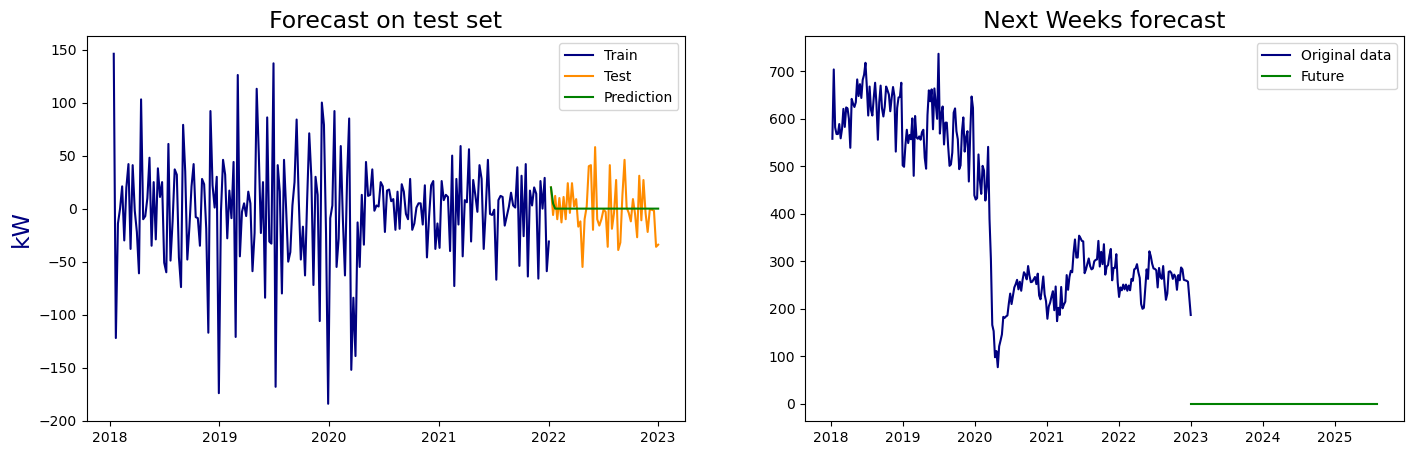

In [106]:
prediction=pd.DataFrame(arima_model.predict(n_periods=96),index=test.index)
prediction.columns=['predicted_yield']

fig,ax= plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(17,5))
ax[0].plot(train,label='Train',color='navy')
ax[0].plot(test,label='Test',color='darkorange')
ax[0].plot(prediction,label='Prediction',color='green')
ax[0].legend()
ax[0].set_title('Forecast on test set',size=17)
ax[0].set_ylabel('kW',color='navy',fontsize=17)


f_prediction=pd.DataFrame(arima_model.predict(n_periods=194),index=future_dates)
f_prediction.columns=['predicted_yield']
ax[1].plot(ts_mv,label='Original data',color='navy')
ax[1].plot(f_prediction,label='Future',color='green')
ax[1].legend()
ax[1].set_title('Next Weeks forecast',size=17)
plt.show()

In [45]:
ARIMA3 = ARIMA(train, order=(0, 0, 1)).fit()
ARIMA3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Moving Violation   No. Observations:                  208
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1101.442
Date:                Mon, 10 Apr 2023   AIC                           2208.883
Time:                        17:19:38   BIC                           2218.896
Sample:                    01-14-2018   HQIC                          2212.932
                         - 01-02-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7006      2.284     -0.744      0.457      -6.178       2.776
ma.L1         -0.3853      0.043     -8.894      0.000      -0.470      -0.300
sigma2      2326.3366    174.549     13.328      0.000    1984.226    2668.447
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                52.76
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
train_pred3 = ARIMA3.predict()
train_pred3

2018-01-14    -1.700591
2018-01-21   -51.250956
2018-01-28    25.044201
2018-02-04    13.300289
2018-02-11     3.421573
                ...    
2021-12-05    19.395442
2021-12-12    -4.245170
2021-12-19    -3.336154
2021-12-26   -14.158938
2022-01-02    15.575597
Freq: W-SUN, Name: predicted_mean, Length: 208, dtype: float64

In [47]:
#
ARIMA3_rmse = np.sqrt(mean_squared_error(train, train_pred3))
print(f'Third ARIMA Model RMSE: {ARIMA3_rmse}')

Third ARIMA Model RMSE: 48.37941326079546


In [48]:
y_pred = ARIMA3.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA3.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

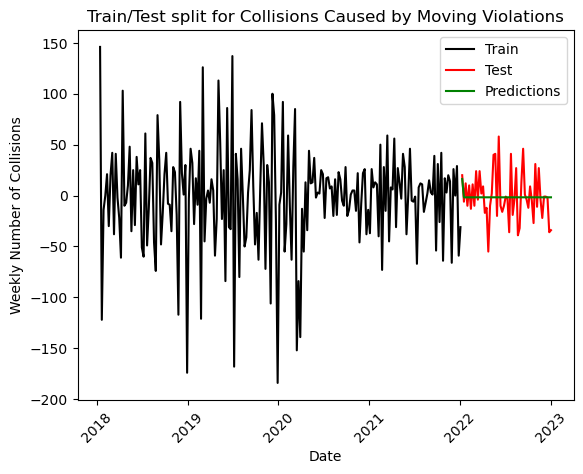

In [49]:
plt.plot(train, color = "black",label='Train')
plt.plot(test, color = "red",label='Test')
plt.ylabel('Weekly Number of Collisions')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Collisions Caused by Moving Violations")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend();

In [50]:
ARIMA4 = ARIMA(train, order=(1, 1, 0)).fit()
ARIMA4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Moving Violation   No. Observations:                  208
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1163.308
Date:                Mon, 10 Apr 2023   AIC                           2330.616
Time:                        17:20:08   BIC                           2337.281
Sample:                    01-14-2018   HQIC                          2333.311
                         - 01-02-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5653      0.049    -11.615      0.000      -0.661      -0.470
sigma2      4447.3939    350.303     12.696      0.000    3760.813    5133.975
===================================================================================
Ljung-Box (L1) (Q):                   7.72   Jarque-Bera (JB):                19.90
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
train_pred4 = ARIMA4.predict()
train_pred4

2018-01-14      0.000000
2018-01-21    145.464017
2018-01-28     29.505886
2018-02-04    -75.054611
2018-02-11     -7.914487
                 ...    
2021-12-05    -20.774362
2021-12-12    -26.009483
2021-12-19     14.698332
2021-12-26     12.605706
2022-01-02     -9.251799
Freq: W-SUN, Name: predicted_mean, Length: 208, dtype: float64

In [52]:
#
ARIMA3_rmse = np.sqrt(mean_squared_error(train, train_pred4))
print(f'Fourth ARIMA Model RMSE: {ARIMA3_rmse}')

Fourth ARIMA Model RMSE: 68.09863961422661


In [53]:
y_pred = ARIMA4.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA4.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

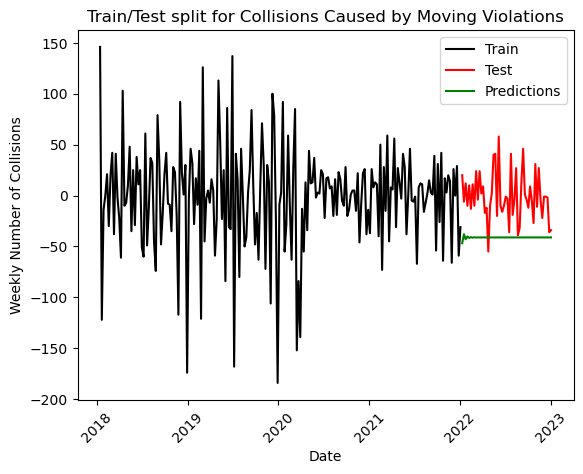

In [54]:
plt.plot(train, color = "black",label='Train')
plt.plot(test, color = "red",label='Test')
plt.ylabel('Weekly Number of Collisions')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Collisions Caused by Moving Violations")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend();